In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Load the data
sol = pd.read_excel("/content/Husskonen_Solubility_Features.xlsx", verbose=False)
print(sol.shape)
print(sol.columns)

# instances = 932 features = 2256
# Extract target variable - targets
t = sol["LogS.M."].values

# Extract feature variables - features
colnames = sol.columns # take all the columns
X = sol[colnames[5:len(colnames) - 1]] # take 5 to the one before last one.
N, p = X.shape
print(X.shape)
print(t.shape)

# Split data into training and test sets
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)


(932, 2261)
Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)
(932, 2255)
(932,)


Top 10 features: Index(['SpMax4_Bh(m)', 'P_VSA_v_3', 'P_VSA_p_3', 'MLOGP', 'MLOGP2', 'ALOGP',
       'ALOGP2', 'BLTF96', 'BLTD48', 'BLTA96'],
      dtype='object')
Test MSE with all features: 1.5362387920234153
Test MSE with top 10 features: 0.734490256749245


Text(0.5, 1.0, 'All Features')

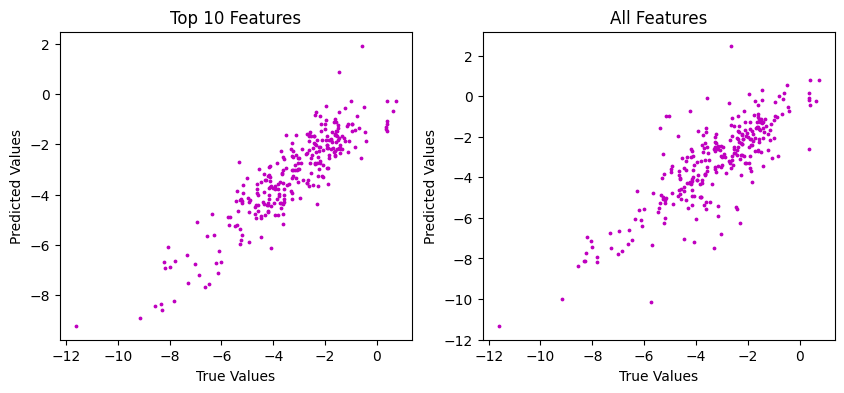

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


from sklearn.feature_selection import SelectKBest, f_regression
# Define the feature selection method
selector = SelectKBest(score_func=f_regression, k=10)

# Fit the selector to the training data
selector.fit(X_train, t_train)

# Get the indices of the top 10 features
idx_top10 = selector.get_support(indices=True)

# Get the names of the top 10 features
top10_features = X_train.columns[idx_top10]
print(f'Top 10 features: {top10_features}')

optimal_alpha_error = 0.5

# Train a Lasso regression model on all features
ridge_all = Ridge(alpha=optimal_alpha_error).fit(X_train, t_train)

# Evaluate the model on the test data
t_pred_all = ridge_all.predict(X_test)
mse_all = mean_squared_error(t_test, t_pred_all)
print(f'Test MSE with all features: {mse_all}')

# Train a Lasso regression model on the top 10 features
ridge_top10 = Ridge(alpha=optimal_alpha_error).fit(X_train[top10_features], t_train)

# Evaluate the model on the test data
t_pred_top10 = ridge_top10.predict(X_test[top10_features])
mse_top10 = mean_squared_error(t_test, t_pred_top10)
print(f'Test MSE with top 10 features: {mse_top10}')


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_test, t_pred_top10, c='m', s=3)
ax[0].set_xlabel('True Values')
ax[0].set_ylabel('Predicted Values')
ax[0].set_title('Top 10 Features')

ax[1].scatter(t_test, t_pred_all, c='m', s=3)
ax[1].set_xlabel('True Values')
ax[1].set_ylabel('Predicted Values')
ax[1].set_title('All Features')